___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project I will focus on exploratory data analysis of stock prices. This project is just meant to practice my visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
%matplotlib inline

In [138]:
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2024, 1, 1)

In [140]:
# Bank of America
BAC = yf.download("BAC", start, end)

# CitiGroup
C = yf.download("C", start, end)

# Goldman Sachs
GS = yf.download("GS", start, end)

# JPMorgan Chase
JPM = yf.download("JPM", start, end)

# Morgan Stanley
MS = yf.download("MS", start, end)

# Wells Fargo
WFC = yf.download("WFC", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [142]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [144]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [146]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [148]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2008-01-02   41.529999  41.549999  40.349998  40.560001  29.781355  30764600   
2008-01-03   40.630001  40.810001  40.250000  40.299999  29.590448  22589500   
2008-01-04   40.000000  40.290001  39.759998  39.849998  29.260027  34921700   
2008-01-07   40.049999  40.240002  39.259998  39.900002  29.296732  31884400   
2008-01-08   40.180000  40.209999  38.279999  38.410000  28.202690  42143300   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2008-01-02   297.299988  298.899994  288.500000  289.200012  ...  50.310001   
2008-01-03   292.200012  293.899994  288.899994  289.299988  ...  50.580002   
2008-01-04   286.100006  290.299988  280.399994  282.399994  ...  48.860001   
2008-01-07   283.399994  287.600006  279.299988  282.600006  ...  47.950001   
2008-01-08   284.600006  287.000000  270.100006  271.399994  ...  45.880001   

Bank Ticker                                        WFC                        \
Stock Info       Close  Adj Close    Volume       Open       High        Low   
Date                                                                           
2008-01-02   50.950001  35.464577  17624100  30.480000  30.480000  28.980000   
2008-01-03   50.939999  35.457611  11422200  29.250000  29.370001  28.170000   
2008-01-04   49.299999  34.316036  14448500  28.250000  28.320000  26.990000   
2008-01-07   48.310001  33.626949  18767500  27.700001  28.040001  27.110001   
2008-01-08   46.400002  32.297474  22467500  27.870001  28.110001  26.370001   

Bank Ticker                              
Stock Info   Close  Adj Close    Volume  
Date                                     
2008-01-02   29.10  18.486849  24387800  
2008-01-03   28.52  18.118376  26313100  
2008-01-04   27.49  17.464031  50818700  
2008-01-07   27.68  17.584740  25887100  
2008-01-08   26.50  16.835104  41495200  

[5 rows x 36 columns]

# EDA

** What is the max Close price for each bank's stock throughout the time period?**

In [150]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     49.380001
C      296.899994
GS     423.850006
JPM    171.779999
MS     108.730003
WFC     65.930000
dtype: float64

In [152]:
returns = pd.DataFrame()

In [154]:
for tick in tickers:
    returns[tick+'Return']= bank_stocks[tick]['Close'].pct_change()
returns.head()

,BACReturn,CReturn,GSReturn,JPMReturn,MSReturn,WFCReturn
Date,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,-0.006410,0.000346,-0.013295,-0.006877,-0.000196,-0.019931
2008-01-04,-0.011166,-0.023851,-0.023970,-0.022684,-0.032195,-0.036115
2008-01-07,0.001255,0.000708,-0.026009,0.010017,-0.020081,0.006912
2008-01-08,-0.037343,-0.039632,-0.026858,-0.039671,-0.039536,-0.042630


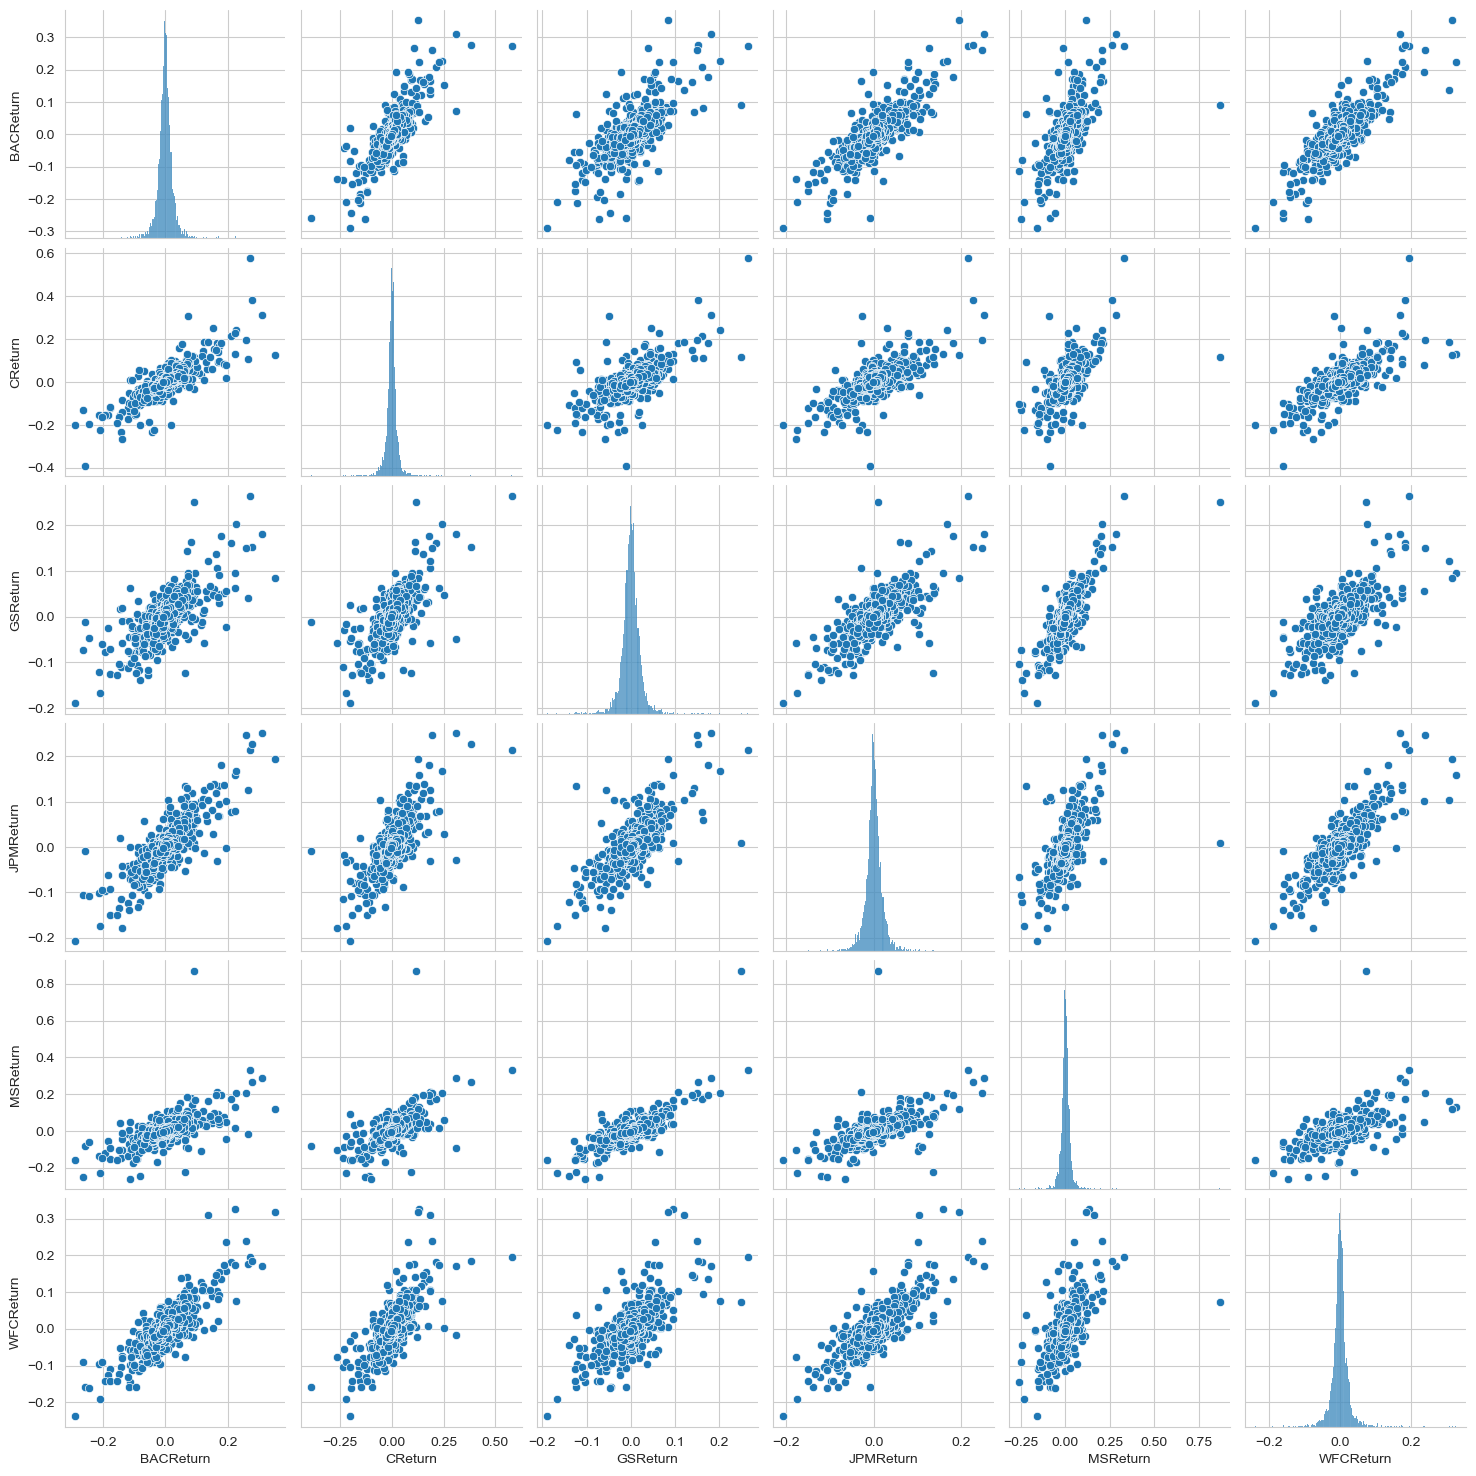

In [156]:
import seaborn as sns
sns.pairplot(returns[1:])

In [204]:
**It appears that nearly all the bank stocks have shown positive returns, except for Morgan Stanley, which has primarily experienced negative returns from 2008 to 2023.**

SyntaxError: invalid syntax (4078376949.py, line 1)

In [157]:
returns.idxmin()

BACReturn   2009-01-20
CReturn     2009-02-27
GSReturn    2009-01-20
JPMReturn   2009-01-20
MSReturn    2008-10-09
WFCReturn   2009-01-20
dtype: datetime64[ns]

In [160]:
returns.idxmax()

BACReturn   2009-04-09
CReturn     2008-11-24
GSReturn    2008-11-24
JPMReturn   2009-01-21
MSReturn    2008-10-13
WFCReturn   2008-07-16
dtype: datetime64[ns]

In [209]:
**The dates in early 2009 coincide with the aftermath of the 2008 financial crisis. Banks were facing severe challenges, including rising loan defaults and a lack of liquidity. The economic downturn led to significant losses, resulting in negative returns for these stocks. The dates for maximum returns reflect a recovery phase for the banking sector. After the initial shock of the financial crisis, government interventions, such as the Troubled Asset Relief Program (TARP), were introduced to stabilize the banking system. Investor sentiment began to improve as signs of recovery appeared.The close proximity of minimum and maximum returns for these bank stocks illustrates the volatility and rapid shifts in market sentiment during the financial crisis.**

SyntaxError: invalid syntax (4294241424.py, line 1)

In [162]:
returns.std()

BACReturn    0.032160
CReturn      0.033816
GSReturn     0.023165
JPMReturn    0.024770
MSReturn     0.032473
WFCReturn    0.027631
dtype: float64

In [164]:
returns.loc['2023-01-01':'2023-12-31'].std()

BACReturn    0.016941
CReturn      0.016002
GSReturn     0.015227
JPMReturn    0.013112
MSReturn     0.016307
WFCReturn    0.017460
dtype: float64

In [211]:
**The risks appear to be similar across all banks**

SyntaxError: invalid syntax (1636227989.py, line 1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13960\2774798012.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='BACReturn', ylabel='Density'>

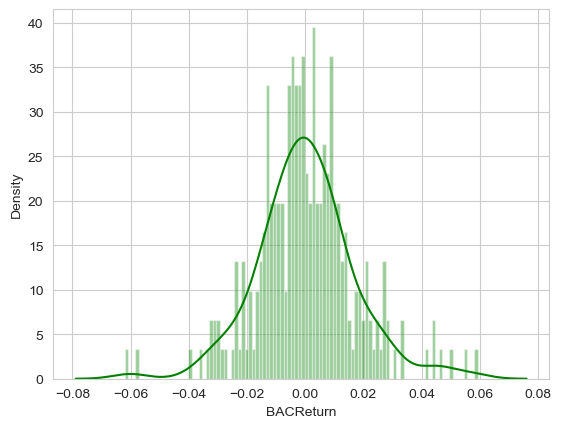

In [213]:
sns.distplot(returns.loc['2023-01-01':'2023-12-31']['BACReturn'],color='green',bins=100)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13960\321654507.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='CReturn', ylabel='Density'>

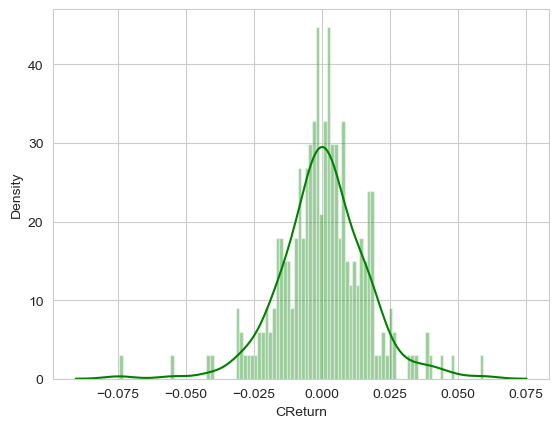

In [170]:
sns.distplot(returns.loc['2023-01-01':'2023-12-31']['CReturn'],color='green',bins=100)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13960\1215997280.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='GSReturn', ylabel='Density'>

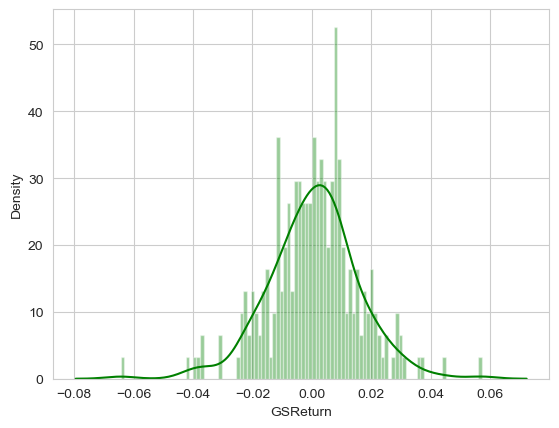

In [215]:
sns.distplot(returns.loc['2023-01-01':'2023-12-31']['GSReturn'],color='green',bins=100)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13960\2414958364.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='JPMReturn', ylabel='Density'>

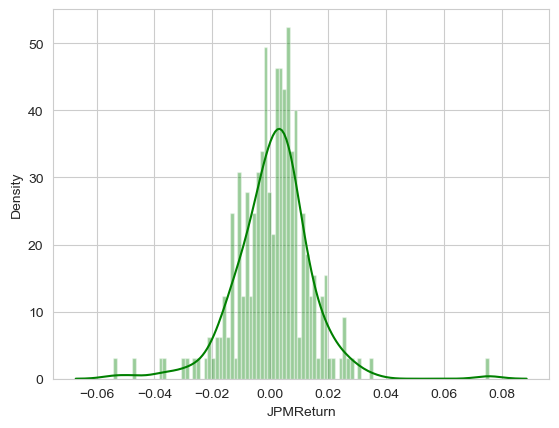

In [217]:
sns.distplot(returns.loc['2023-01-01':'2023-12-31']['JPMReturn'],color='green',bins=100)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13960\18700083.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='MSReturn', ylabel='Density'>

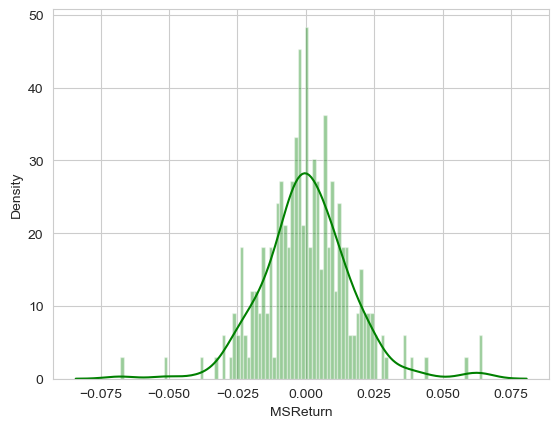

In [219]:
sns.distplot(returns.loc['2023-01-01':'2023-12-31']['MSReturn'],color='green',bins=100)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13960\1712569137.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='WFCReturn', ylabel='Density'>

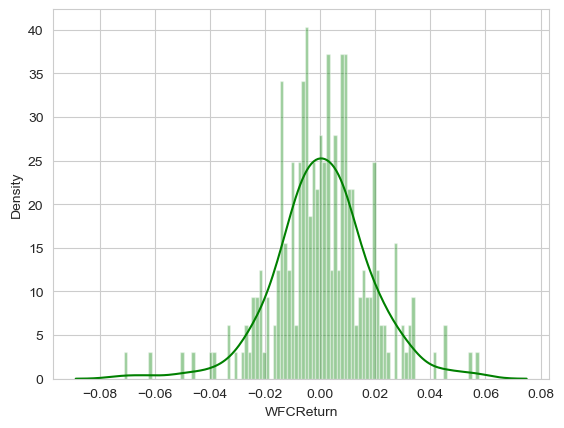

In [221]:
sns.distplot(returns.loc['2023-01-01':'2023-12-31']['WFCReturn'],color='green',bins=100)

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

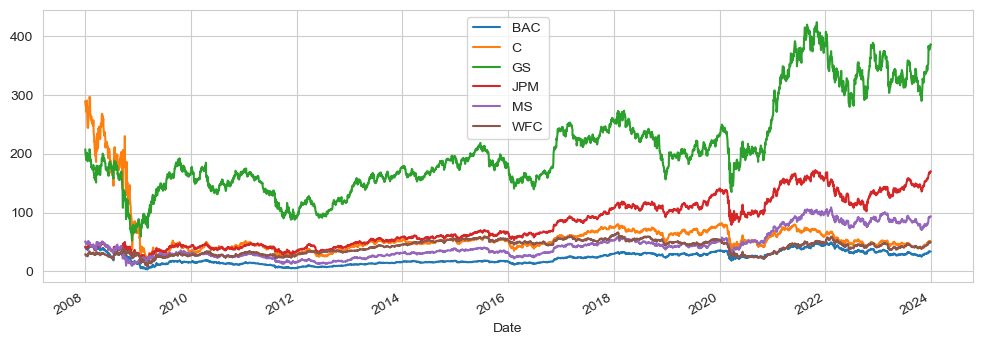

In [175]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

In [227]:
** Goldman Sachs' stock volatility is primarily due to its focus on investment banking and trading activities. These businesses are inherently more exposed to market fluctuations and economic downturns compared to the more traditional commercial banking operations of BAC, WFC, and C.

Investment Banking: Goldman Sachs' investment banking division involves underwriting securities, providing mergers and acquisitions advice, and trading securities. These activities are directly tied to market conditions and deal flow, which can fluctuate significantly over time.
Trading: Goldman Sachs is a major player in the trading of securities, derivatives, and commodities. This exposes the company to market volatility and can lead to significant fluctuations in earnings.**

SyntaxError: unterminated string literal (detected at line 1) (849963401.py, line 1)

E:\Marcial\Lib\site-packages\cufflinks\plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



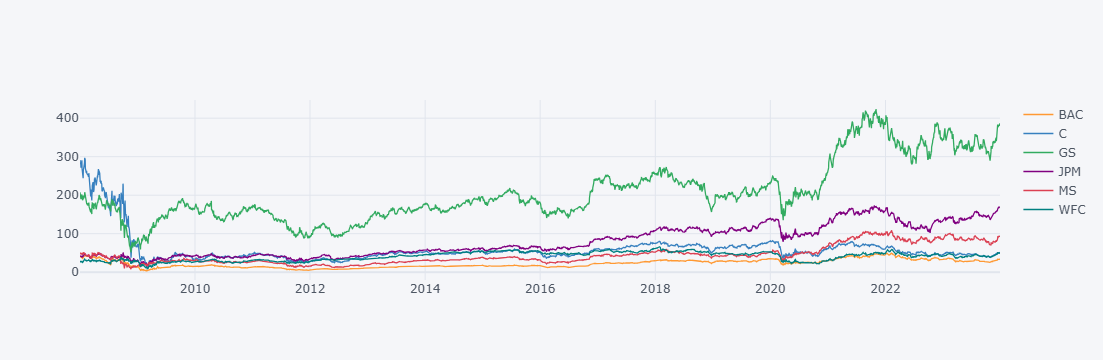

In [177]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

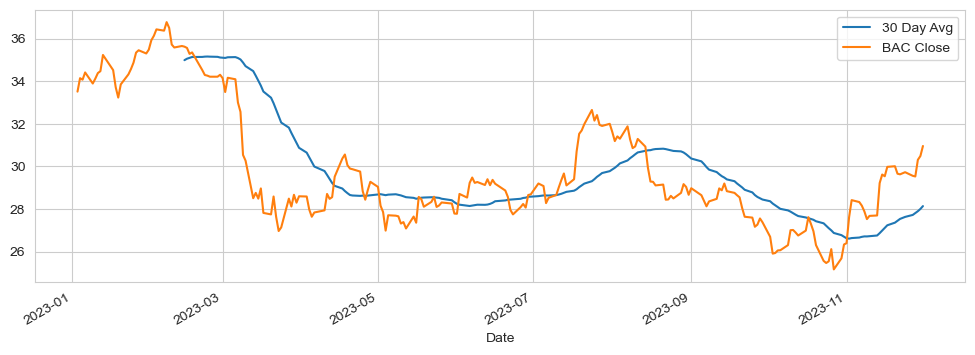

In [179]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2023-01-01':'2023-12-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2023-01-01':'2023-12-01'].plot(label='BAC Close')
plt.legend()

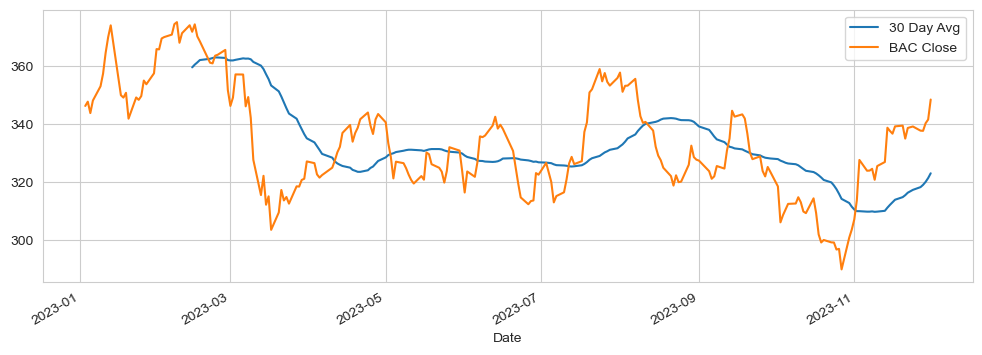

In [181]:
plt.figure(figsize=(12,4))
GS['Close'].loc['2023-01-01':'2023-12-01'].rolling(window=30).mean().plot(label='30 Day Avg')
GS['Close'].loc['2023-01-01':'2023-12-01'].plot(label='BAC Close')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

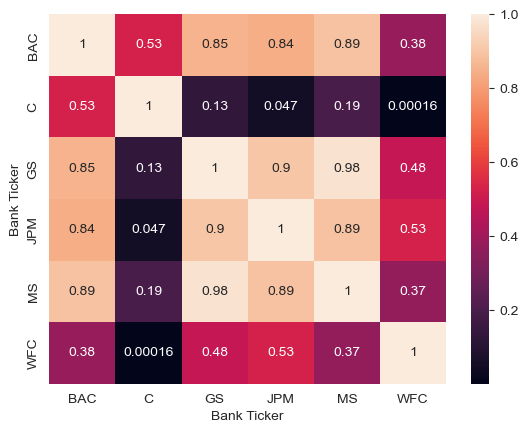

In [38]:
sns.heatmap(bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').corr(),annot = True)

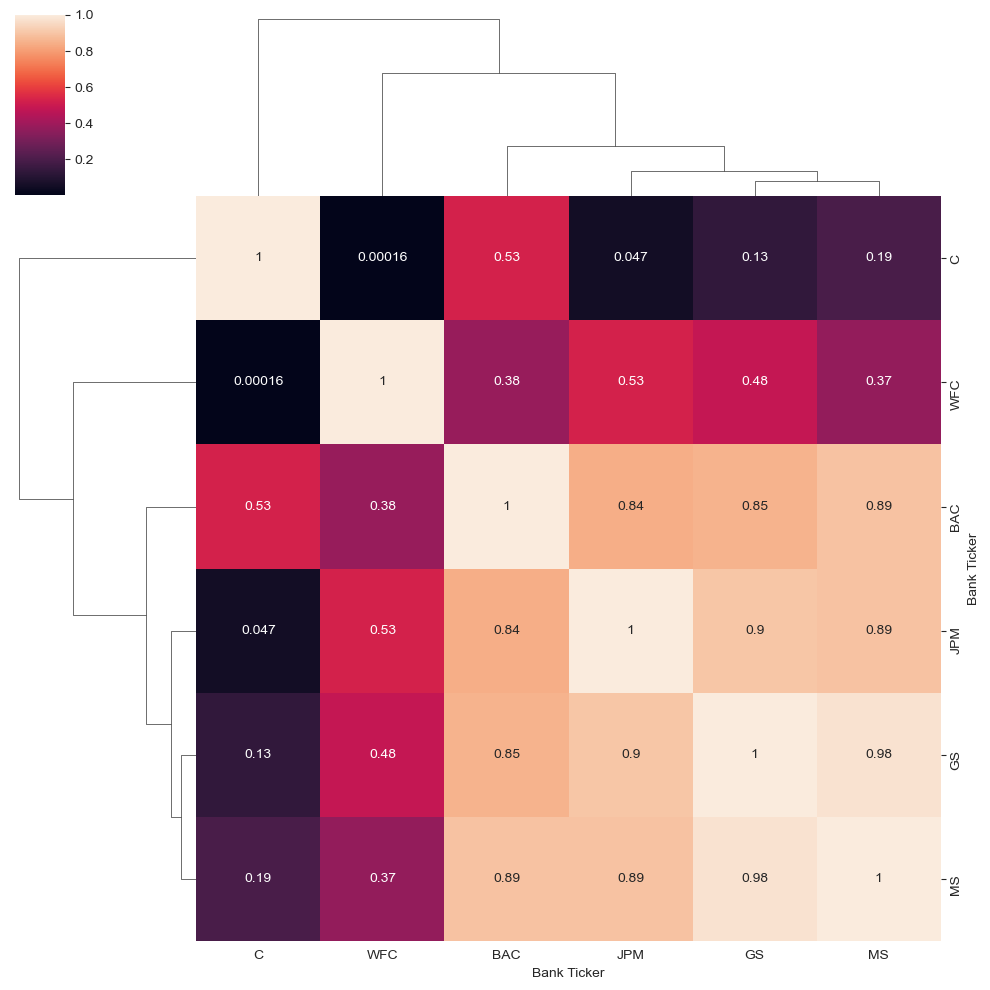

In [40]:
sns.clustermap(bank_stocks.xs(key='Close', axis = 1, level = 'Stock Info').corr(),annot = True)

In [42]:
** Goldman Sachs' high profile and perceived importance in the financial sector make it a frequent target for investor scrutiny. Negative or positive news about the company can have a disproportionate impact on its stock price, leading to increased volatility. Except WFC and C bank because these 2 are more diversified business mix and focus on consumer and commercial banking can buffer its stock price from market fluctuations 